In [1]:
import sys
sys.path.insert(0, '..')

# Analyzing a run

Below is some helper code for quickly visualizing and analyzing a set of experiments. Using the helper function in `analyze.py`, each experiment is loaded into a pandas DataFrame, with the metrics reported (e.g. SDR, SIR, SAR) for 
each file in the test dataset. All of the associated configuration info for each experiment is also reported alongside
the metrics, making it easy to test the effect of different parameters on the performance.

Since the test script altered the number of layers and the bidirectionality of the recurrent stack, the analysis below shows the effects of those parameters.

## Loading the dataframes

In [8]:
from scripts import analyze
from runners.utils import load_yaml
import pandas as pd
import matplotlib.pyplot as plt

jobs = load_yaml('../experiments/out/music_dpcl/analyze.yml')['jobs']
data = []
for _job in jobs:
    _data, _config, _exp = analyze.main(_job['config'])
    data.append(_data)

2020-01-12:17:16:51,724 INFO     [experiment_utils.py:50] Experiment is already set up @ /home/pseetharaman/artifacts//cookiecutter/music/5f3e44cd6ed14bb3be13be8c44250f12!
COMET INFO: old comet version (2.0.18) detected. current: 3.0.2 please update your comet lib with command: `pip install --no-cache-dir --upgrade comet_ml`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/pseeth/cookiecutter-music/5f3e44cd6ed14bb3be13be8c44250f12

2020-01-12:17:16:52,585 INFO     [experiment_utils.py:50] Experiment is already set up @ /home/pseetharaman/artifacts//cookiecutter/music/0707b7df620742f6a184b8340253088c!
COMET INFO: old comet version (2.0.18) detected. current: 3.0.2 please update your comet lib with command: `pip install --no-cache-dir --upgrade comet_ml`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/pseeth/cookiecutter-music/0707b7df620742f6a184b8340253088c

2020-01-12:17:16:53,440 INFO     [experiment_utils.py:50] Experiment is already set up @ /home/pse

### Listing all the possible keys contained in the DataFrame

In [4]:
d.keys()

Index(['experiment_key', 'notes', 'file_name', 'dataset', 'source_name',
       'algorithm_config_args_clustering_options_posterior_alpha',
       'algorithm_config_args_enhancement_amount',
       'algorithm_config_args_mask_type', 'algorithm_config_args_model_path',
       'algorithm_config_args_num_sources', 'algorithm_config_args_percentile',
       'algorithm_config_class', 'dataset_config_cache',
       'dataset_config_data_keys_for_training',
       'dataset_config_excerpt_selection_strategy', 'dataset_config_format',
       'dataset_config_fraction_of_dataset', 'dataset_config_group_sources',
       'dataset_config_hop_length', 'dataset_config_ignore_sources',
       'dataset_config_length', 'dataset_config_n_fft',
       'dataset_config_num_channels', 'dataset_config_output_type',
       'dataset_config_overwrite_cache', 'dataset_config_sample_rate',
       'dataset_config_source_labels', 'dataset_config_use_librosa_stft',
       'dataset_config_weight_threshold', 'dataset_con

## Effect of bidirectionality

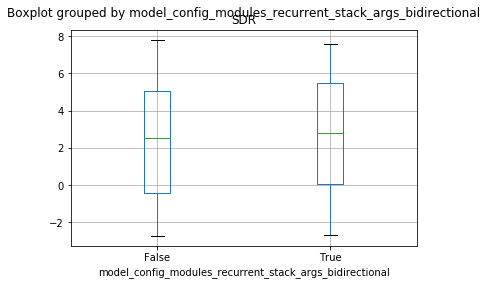

In [9]:
data = pd.concat(data)
data.boxplot(column='SDR', by='model_config_modules_recurrent_stack_args_bidirectional')

## Effect of number of layers

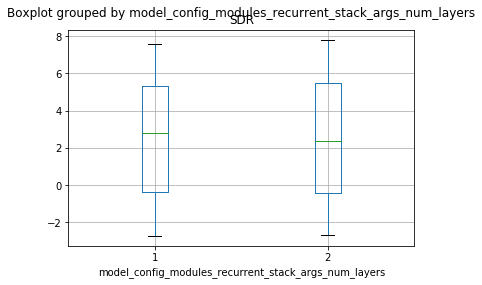

In [11]:
data.boxplot(column='SDR', by='model_config_modules_recurrent_stack_args_num_layers')